In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error

In [48]:
dataset = pd.read_csv("https://github.com/MainakRepositor/Datasets/raw/master/energy_efficiency_data.csv")

In [49]:
X = dataset.drop(columns=['Heating_Load'])
y = dataset['Heating_Load'].values

In [50]:
scaler = StandardScaler()
XProcessado = scaler.fit_transform(X)

In [51]:
modeloGD = SGDRegressor(
    max_iter=5000,
    tol=1e-4,
    eta0=0.01,
    learning_rate='adaptive',
    penalty='l2',
    early_stopping=True,
    random_state=0
)
modeloGD.fit(XProcessado, y)
yPreditoGD = modeloGD.predict(XProcessado)

In [52]:
print("MSE Gradiente Descendente Automático:", mean_squared_error(y, yPreditoGD))

MSE Gradiente Descendente Automático: 3.1569238234172983


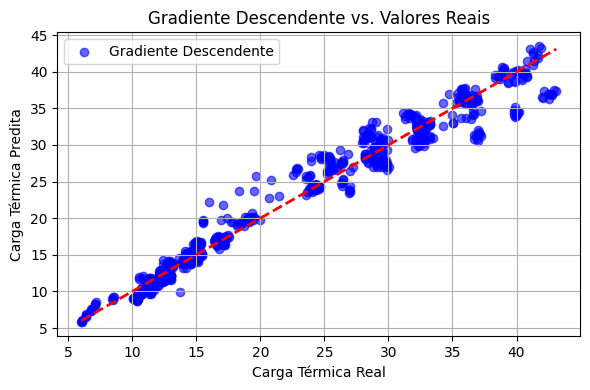

In [54]:
plt.figure(figsize=(6,4))
plt.scatter(y, yPreditoGD, alpha=0.6, label='Gradiente Descendente', color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.xlabel('Carga Térmica Real')
plt.ylabel('Carga Térmica Predita')
plt.legend()
plt.title('Gradiente Descendente vs. Valores Reais')
plt.grid(True)
plt.tight_layout()
plt.savefig('gradienteDescVsReal.png')